### Ejercicio 1: Preparación del ambiente de trabajo
- Importe las librerías clásicas a utilizar.
- Para este ejercicio implementaremos árboles de regresión, por lo que deberá importar la clase DecisionTreeRegressor.
- De manera adicional importe las funciones y clases necesarias para generar un desempeño de métricas en problemas de regresión, división de muestras y búsqueda de grilla con validación cruzada.
- Elimine la columna 'Unnamed: 0' cuando cargue los datos.

In [1]:
# "Librerías" Básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lec7_graphs as afx
import pickle

# Modelo
from sklearn.tree import DecisionTreeRegressor

# Métricas de regresión
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score

# Division de muestra y Busqueda de Grilla con validación cruzada
from sklearn.model_selection import GridSearchCV, train_test_split

from IPython.display import display, Markdown
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (10, 10)
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('ames_housing.csv').drop(columns= 'Unnamed: 0')
df.head()

MS_SubClass                 MS_Zoning  \
0  One_Story_1946_and_Newer_All_Styles   Residential_Low_Density   
1  One_Story_1946_and_Newer_All_Styles  Residential_High_Density   
2  One_Story_1946_and_Newer_All_Styles   Residential_Low_Density   
3  One_Story_1946_and_Newer_All_Styles   Residential_Low_Density   
4             Two_Story_1946_and_Newer   Residential_Low_Density   

   Lot_Frontage  Lot_Area Street            Alley           Lot_Shape  \
0           141     31770   Pave  No_Alley_Access  Slightly_Irregular   
1            80     11622   Pave  No_Alley_Access             Regular   
2            81     14267   Pave  No_Alley_Access  Slightly_Irregular   
3            93     11160   Pave  No_Alley_Access             Regular   
4            74     13830   Pave  No_Alley_Access  Slightly_Irregular   

  Land_Contour Utilities Lot_Config Land_Slope Neighborhood Condition_1  \
0          Lvl    AllPub     Corner        Gtl   North_Ames        Norm   
1          Lvl    AllPub     Inside        Gtl   North_Ames       Feedr   
2          Lvl    AllPub     Corner        Gtl   North_Ames        Norm   
3          Lvl    AllPub     Corner        Gtl   North_Ames        Norm   
4          Lvl    AllPub     Inside        Gtl      Gilbert        Norm   

  Condition_2 Bldg_Type House_Style   Overall_Qual   Overall_Cond  Year_Built  \
0        Norm    OneFam   One_Story  Above_Average        Average        1960   
1        Norm    OneFam   One_Story        Average  Above_Average        1961   
2        Norm    OneFam   One_Story  Above_Average  Above_Average        1958   
3        Norm    OneFam   One_Story           Good        Average        1968   
4        Norm    OneFam   Two_Story        Average        Average        1997   

   Year_Remod_Add Roof_Style Roof_Matl Exterior_1st Exterior_2nd Mas_Vnr_Type  \
0            1960        Hip   CompShg      BrkFace      Plywood        Stone   
1            1961      Gable   CompShg      VinylSd      VinylSd         None   
2            1958        Hip   CompShg      Wd Sdng      Wd Sdng      BrkFace   
3            1968        Hip   CompShg      BrkFace      BrkFace         None   
4            1998      Gable   CompShg      VinylSd      VinylSd         None   

   Mas_Vnr_Area Exter_Qual Exter_Cond Foundation Bsmt_Qual Bsmt_Cond  \
0           112    Typical    Typical     CBlock   Typical      Good   
1             0    Typical    Typical     CBlock   Typical   Typical   
2           108    Typical    Typical     CBlock   Typical   Typical   
3             0       Good    Typical     CBlock   Typical   Typical   
4             0    Typical    Typical      PConc      Good   Typical   

  Bsmt_Exposure BsmtFin_Type_1  BsmtFin_SF_1 BsmtFin_Type_2  BsmtFin_SF_2  \
0            Gd            BLQ             2            Unf             0   
1            No            Rec             6            LwQ           144   
2            No            ALQ             1            Unf             0   
3            No            ALQ             1            Unf             0   
4            No            GLQ             3            Unf             0   

   Bsmt_Unf_SF  Total_Bsmt_SF Heating Heating_QC Central_Air Electrical  \
0          441           1080    GasA       Fair           Y      SBrkr   
1          270            882    GasA    Typical           Y      SBrkr   
2          406           1329    GasA    Typical           Y      SBrkr   
3         1045           2110    GasA  Excellent           Y      SBrkr   
4          137            928    GasA       Good           Y      SBrkr   

   First_Flr_SF  Second_Flr_SF  Low_Qual_Fin_SF  Gr_Liv_Area  Bsmt_Full_Bath  \
0          1656              0                0         1656               1   
1           896              0                0          896               0   
2          1329              0                0         1329               0   
3          2110              0                0         2110               1   
4      

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
MS_SubClass           2930 non-null object
MS_Zoning             2930 non-null object
Lot_Frontage          2930 non-null int64
Lot_Area              2930 non-null int64
Street                2930 non-null object
Alley                 2930 non-null object
Lot_Shape             2930 non-null object
Land_Contour          2930 non-null object
Utilities             2930 non-null object
Lot_Config            2930 non-null object
Land_Slope            2930 non-null object
Neighborhood          2930 non-null object
Condition_1           2930 non-null object
Condition_2           2930 non-null object
Bldg_Type             2930 non-null object
House_Style           2930 non-null object
Overall_Qual          2930 non-null object
Overall_Cond          2930 non-null object
Year_Built            2930 non-null int64
Year_Remod_Add        2930 non-null int64
Roof_Style            2930 non-null o

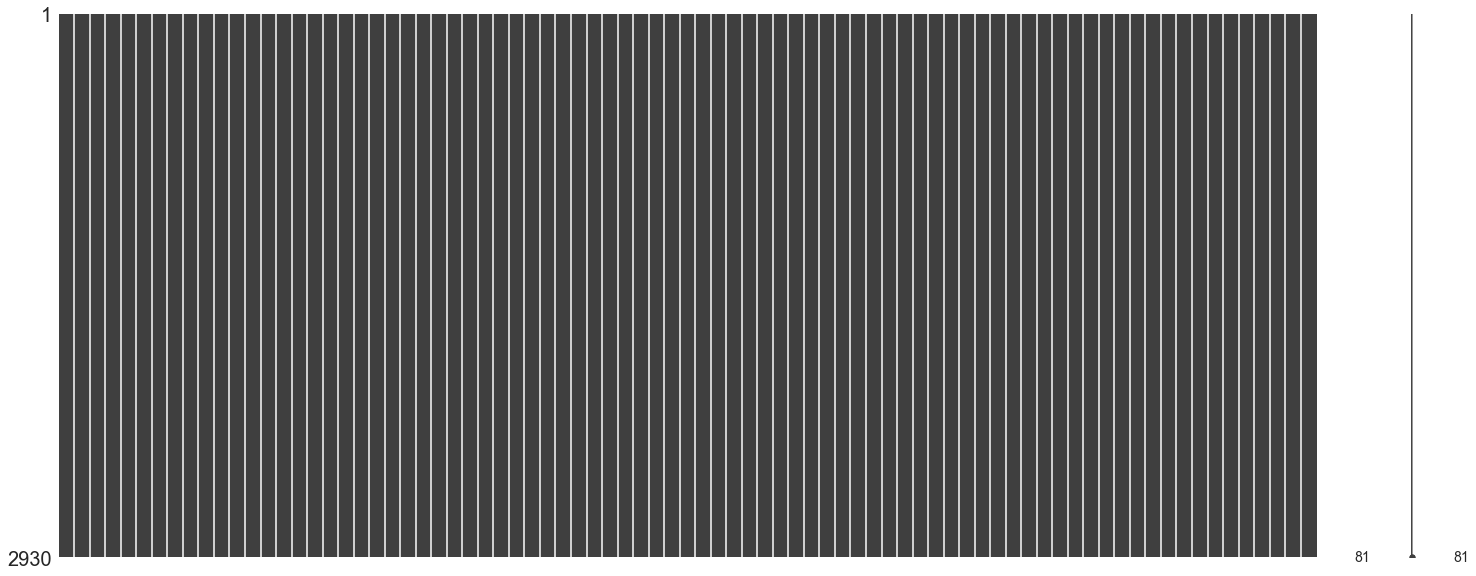

In [4]:
import missingno as msno
msno.matrix(df)

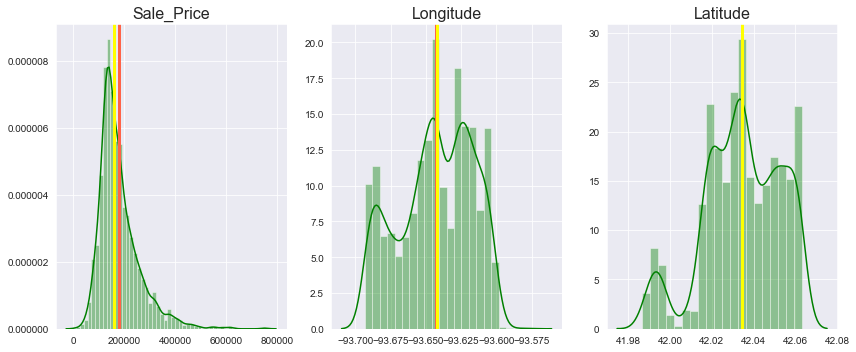

In [5]:
# Se analizan las variables continuas y vector objetivo
attr = ['Sale_Price', 'Longitude', 'Latitude']
fig = plt.figure(figsize=(12, 5))
for i, a in enumerate(attr):
    plt.subplot(1, 3, i+1)
    sns.distplot(df[a], color='green')
    plt.axvline(np.mean(df[a]), color='tomato', label = "media", lw=3)
    plt.axvline(np.median(df[a]), color='yellow', label='mediana', lw=3)
    plt.title(a, fontsize=16)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

### Comentarios:

- La variable objetivo se encuentra con una asimetría en su distribución. Se recomienda aplicar funcion log al vector objetivo.

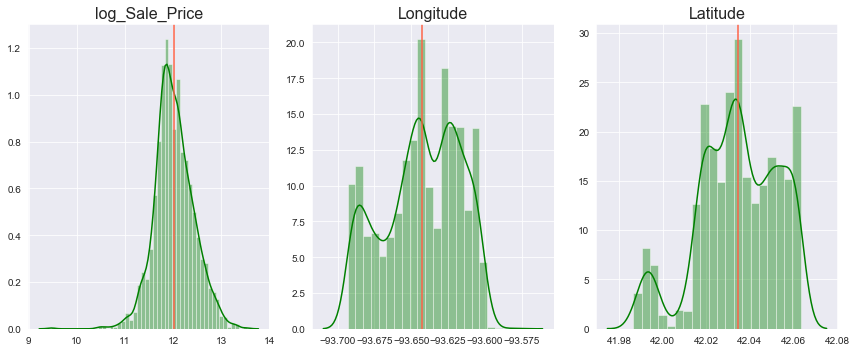

In [6]:
df_log = df.copy(deep=True)
df_log['log_Sale_Price'] = np.log(df_log['Sale_Price'])
df_log.drop(columns='Sale_Price', inplace=True)
attr = ['log_Sale_Price', 'Longitude', 'Latitude']
fig = plt.figure(figsize=(12, 5))
for i, a in enumerate(attr):
    plt.subplot(1, 3, i+1)
    sns.distplot(df_log[a], color='green')
    plt.axvline(np.mean(df_log[a]), color='tomato')
    plt.title(a, fontsize=16)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

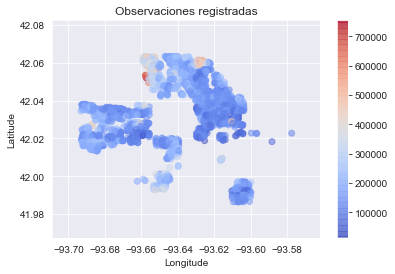

In [7]:
plt.scatter(df['Longitude'],
            df['Latitude'],
            c = df['Sale_Price'],
            cmap='coolwarm',
            alpha=.5)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Observaciones registradas');

### Comentarios:

- En el caso de Ames, a diferencia de California, se nota que la distribución geografica no es relevante. 

### Ejercicio 2: Feature engineering
- Identifique si el dtype de cada pd.Serie en nuestra base de datos se considera 'object' o no. Para todas las variables que sean 'object', realice lo siguiente:
    * 1. Genere una recodificación $K-1$ en cada variable. Para efectos prácticos sólo necesitan eliminar una de las categorías, no se concentren en especificar la categoría a eliminar. Pueden utilizar la función pd.get_dummies con la opción drop_first para ello.
    * 2. Utilizando el método pd.concat , concatene a los atributos creados en la base de datos. tip: No se olvide de eliminar los atributos recodificados, de esta forma evitará un aumento artificial del desempeño del modelo.

In [8]:
# get_dummies function is applied
df_log = pd.get_dummies(df_log, drop_first=True)
df_log.head()

Lot_Frontage  Lot_Area  Year_Built  Year_Remod_Add  Mas_Vnr_Area  \
0           141     31770        1960            1960           112   
1            80     11622        1961            1961             0   
2            81     14267        1958            1958           108   
3            93     11160        1968            1968             0   
4            74     13830        1997            1998             0   

   BsmtFin_SF_1  BsmtFin_SF_2  Bsmt_Unf_SF  Total_Bsmt_SF  First_Flr_SF  \
0             2             0          441           1080          1656   
1             6           144          270            882           896   
2             1             0          406           1329          1329   
3             1             0         1045           2110          2110   
4             3             0          137            928           928   

   Second_Flr_SF  Low_Qual_Fin_SF  Gr_Liv_Area  Bsmt_Full_Bath  \
0              0                0         1656               1   
1              0                0          896               0   
2              0                0         1329               0   
3              0                0         2110               1   
4            701                0         1629               0   

   Bsmt_Half_Bath  Full_Bath  Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  \
0               0          1          0              3              1   
1               0          1          0              2              1   
2               0          1          1              3              1   
3               0          2          1              3              1   
4               0          2          1              3              1   

   TotRms_AbvGrd  Fireplaces  Garage_Cars  Garage_Area  Wood_Deck_SF  \
0              7           2            2          528           210   
1              5           0            1          730           140   
2              6           0            1          312           393   
3              8           2            2          522             0   
4              6           1            2          482           212   

   Open_Porch_SF  Enclosed_Porch  Three_season_porch  Screen_Porch  Pool_Area  \
0             62               0                   0             0          0   
1              0               0                   0           120          0   
2             36               0                   0             0          0   
3              0               0                   0             0          0   
4             34               0                   0             0          0   

   Misc_Val  Mo_Sold  Year_Sold  Longitude   Latitude  log_Sale_Price  \
0         0        5       2010 -93.619754  42.054035       12.278393   
1         0        6       2010 -93.619756  42.053014       11.561716   
2     12500        6       2010 -93.619387  42.052659       12.055250   
3         0        4       2010 -93.617320  42.051245       12.404924   
4         0        3       2010 -93.638933  42.060899       12.154253   

   MS_SubClass_One_Story_1945_and_Older  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   MS_SubClass_One_Story_1946_and_Newer_All_Styles  \
0                                                1   
1                                                1   
2                                                1   
3                                                1   
4                                                0   

   MS_SubClass_One_Story_PUD_1946_and_Newer  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   MS_SubClass_One_Story_with_Finished_Attic_All_Ages  \
0     

In [9]:
print(df.dtypes.value_counts())

object     46
int64      33
float64     2
dtype: int64


### Ejercicio 3: Primer modelo
- Genere muestras de entrenamiento y validación con 'Sale_Price' como vector objetivo y los atributos de la base de datos como matriz.
- Recuerde definir el porcentaje de casos en la muestra de validación y una semilla pseudoaleatoria.
- Posteriormente, entrene un árbol de regresión en la muestra de entrenamiento sin modificar los hiperparámetros.  Reporte las principales métricas de desempeño.
- Comente sobre el desempeño.

In [10]:
df = df_log.dropna() # Eliminamos datos nulos
attributes_mat= df.drop(columns = 'log_Sale_Price') # Matriz de datos sin el vector objetivos
target_vector = df['log_Sale_Price'] # Vector Objetivo



X_train, X_test, y_train, y_test = train_test_split(attributes_mat, target_vector, test_size=.33, random_state=93177)

In [11]:
dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train, y_train)


def report_cont_metrics(model, y_true = y_test, X_text=X_test):
    fit_model = model.predict(X_test)
    R2 = r2_score(y_true, fit_model).round(5)
    RMSE =  np.sqrt(mean_squared_error(y_true, fit_model)).round(5)
    MAE = median_absolute_error(y_true, fit_model).round(5)
    
    return (R2, RMSE, MAE)

In [12]:
report_cont_metrics(dec_tree)

(0.7279, 0.21569, 0.10265)

### Comentarios:

- El R cuadrado es relativamente alto (71%), aunque no es una de las mejores métricas de desempeño. Se nota que el MAE es menor que RMSE, puede que falle en detectar los valores atípicos de precios de casas altos y bajos los subestime.

### Ejercicio 4: Importancia relativa
- Implemente el método plot_importance utilizado en la lectura para reportar la importancia relativa de los atributos.
- Comente sobre cuáles son los principales 10 atributos que afectan la predicción de Sale_Price.
- Separe éstos 10 atributos en una nueva base de datos, junto con el vector objetivo.

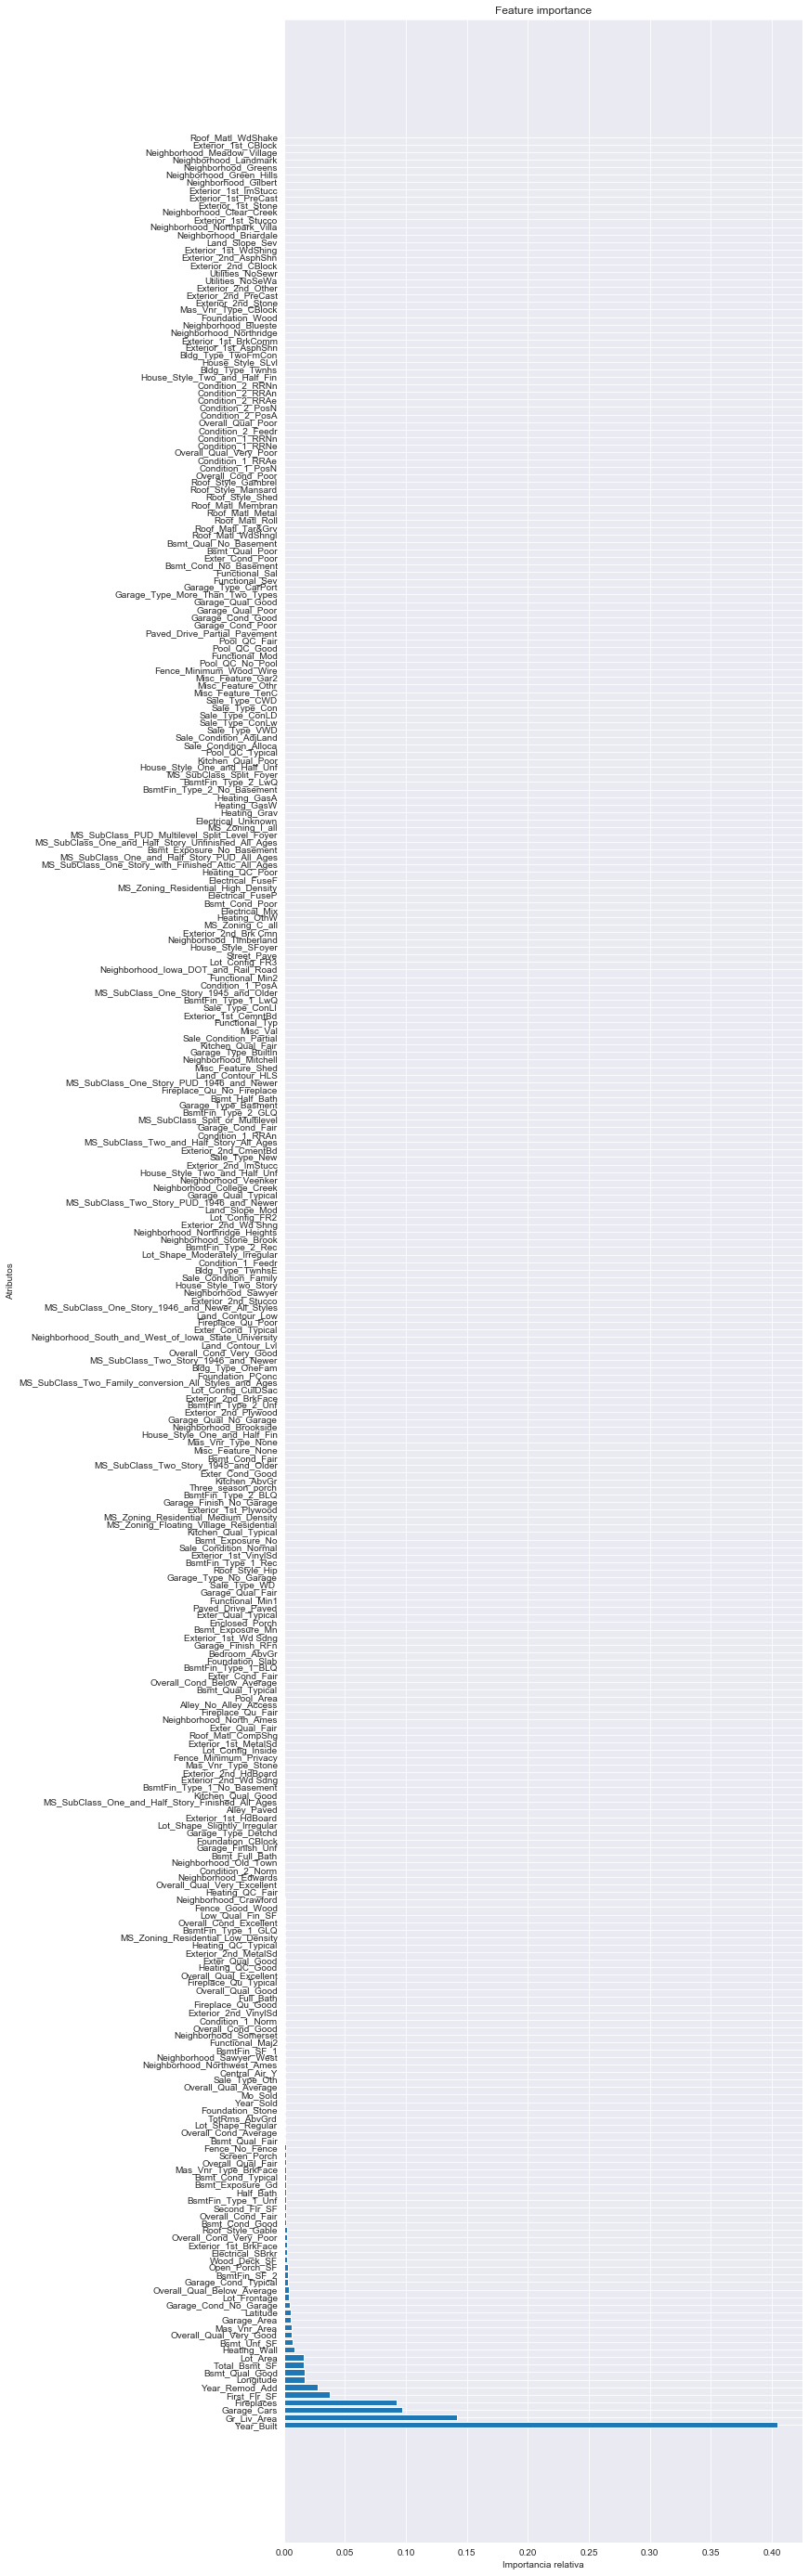

In [13]:
plt.rcParams['figure.figsize'] = (10, 50)
afx.plot_importance(dec_tree, attributes_mat.columns)
plt.xlabel("Importancia relativa");
plt.ylabel('Atributos');

In [14]:
#obtener los atributos con mayor importancia relativa de un modelo

# calcular feature importances
tmp_importance = dec_tree.feature_importances_
# ordernar feature importances de manera descendente
sort_importance = np.argsort(tmp_importance)[::-1]
#reorganizar los nombres de las características para que se coincidan 
names = [attributes_mat.columns[i] for i in sort_importance]
top_ten = names[:10]

print("Top Ten Features:", top_ten)

Top Ten Features: ['Year_Built', 'Gr_Liv_Area', 'Garage_Cars', 'Fireplaces', 'First_Flr_SF', 'Year_Remod_Add', 'Longitude', 'Bsmt_Qual_Good', 'Total_Bsmt_SF', 'Lot_Area']


### Comentarios:

- Dada nuestra elección de modelo y métodos para preprocesar datos, los atributos más significativas estan relacionados a la calidad general, el superficie del living, la capacidad del automóvil y la calidad del material exterior. Estos parecen resultados bastante intuitivos, al menos para alguien con una noción de lo que importa al seleccionar una casa.

### Ejercicio 5: Refactorización del modelo y pickling
- En función de los atributos seleccionados en el ejercicio anterior, vuelva a generar conjuntos de entrenamiento y validación.
- Dentro de los datos de entrenamiento genere una búsqueda de grila con GridSearchCV utilizando los siguientes hiperparámetros:
    - Máximo de atributos: Evalúe todos los posibles atributos.
    - Máximo de profundidad: entre 1 a 32.
    - Validaciones cruzadas : 5.
- Reporte la mejor combinación de hiperparámetros y su desempeño asociado. Compare el desempeño en la muestra de validación con el modelo por defecto.

In [15]:
#generar df con nuevos atributos

X_new = df[top_ten]
y_new = df['log_Sale_Price']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=.33, random_state=93177)


tree_grid = GridSearchCV(DecisionTreeRegressor(),
                                {'max_depth': np.linspace(1, 32, 32),
                                 'max_features': list(range(1,X_train_new.shape[1]))},
                                cv=5,n_jobs=-1).fit(X_train_new, y_train_new)

In [16]:
data2 = {
    'Regression Tree sin HP': [report_cont_metrics(dec_tree)[0],report_cont_metrics(dec_tree)[1], 
                               report_cont_metrics(dec_tree)[2]],
    'Regression Tree con HP': [r2_score(y_test_new, tree_grid.predict(X_test_new)).round(5),
                               np.sqrt(mean_squared_error(
                                       y_test_new, tree_grid.predict(X_test_new))).round(5),
                               median_absolute_error(y_test_new, tree_grid.predict(X_test_new)).round(5)]
}
metrics_df2 = pd.DataFrame(data2, index=['R2', 'RMSE', 'MAE'])
display(metrics_df2.head())

Regression Tree sin HP  Regression Tree con HP
R2                   0.72790                 0.75080
RMSE                 0.21569                 0.20641
MAE                  0.10265                 0.09786

### Comentarios:

- Con sólo 10 atributos el rendimiento es mejor, respecto a el R2 este sube de forma apreciable. Sin embargo, no es una mejora significativa.

In [17]:
tree_grid.best_params_

{'max_depth': 6.0, 'max_features': 9}

In [18]:
tree_grid.best_score_

0.7805532771302627

In [19]:
tree_grid.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=6.0, max_features=9,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

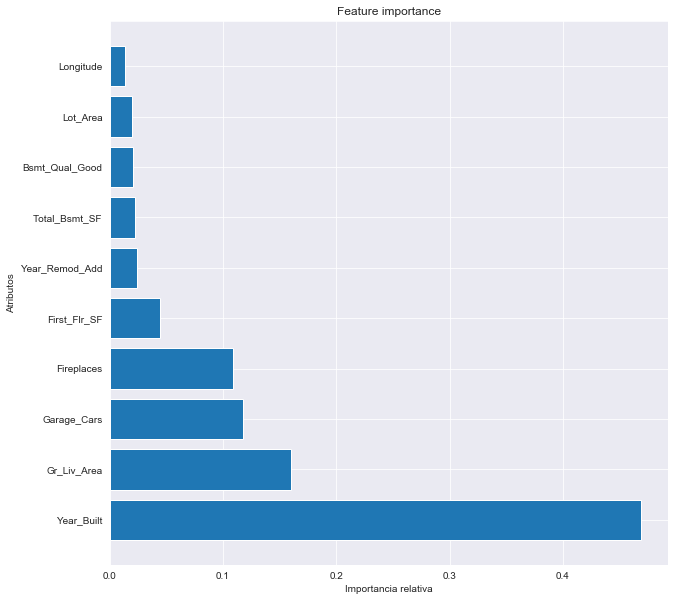

In [20]:
plt.rcParams['figure.figsize'] = (10, 10)

afx.plot_importance(tree_grid.best_estimator_, X_new.columns)
plt.xlabel("Importancia relativa");
plt.ylabel('Atributos');

### Pickling
- Ahora generaremos una serialización de nuestro modelo depurado, y nuestros conjuntos de entrenamiento y validación depurados. Para ello importe el módulo pickle . pickle contiene la función dump , que permite guardar el modelo desarrollado. 
- La forma canónica para desarrollar el pickling es:

In [21]:
pickle.dump(tree_grid.best_estimator_, open('alexandra-bobet-actividad07.sav', 'wb'))

pickle.dump(X_test_new, open('alexandra-bobet-x_test.sav', 'wb'))
pickle.dump(y_test_new, open('alexandra-bobet-y_test.sav', 'wb'))
pickle.dump(X_train_new, open('alexandra-bobet-x_train.sav', 'wb'))
pickle.dump(y_train_new, open('alexandra-bobet-y_train.sav', 'wb'))